In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras import models, layers
from keras.utils import to_categorical
from keras.layers import Flatten
from keras.models import Model
from keras import models
from keras import layers
import warnings
import pydot
import graphviz


from sklearn.model_selection import train_test_split

#cleaning the data
meltwater = pd.read_csv("train.csv")
meltwater.head()

,Anonymous Company id,Geo,"Account Churned? (1=Yes, 0=No)",Year of Change,Month of Change,nbr of days since last account operation,nbr of days since last document operation,docs opened on mobile,docs opened in reports,docs opened on web,docs opened any source,docs tagged on mobile,docs tagged on web,docs shared any source,docs chg sentiment any source,docs hidden any source,mobile logins,web logins,mobile foreground,forgot password
0,1,Geo 1,1,2017,2,35.0,NaN,0,0,0,0,0,0,0,0,0,0,35,0,0
1,2,Geo 2,0,2017,7,NaN,11.0,0,11,0,11,0,0,0,0,0,0,0,0,0
2,3,Geo 1,0,2017,7,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Geo 2,0,2017,5,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Geo 2,0,2017,8,NaN,50.0,0,50,0,50,0,0,0,0,0,0,0,0,0


In [2]:
# my version of keras
import keras
keras.__version__

'2.1.4'

In [3]:
meltwater = meltwater.drop(["Anonymous Company id","Geo","Month of Change", "Year of Change", "forgot password"], axis= 1)

In [4]:

meltwater = meltwater.dropna()
meltwater = meltwater.reset_index(drop=True)

In [5]:
#preprocessing the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
meltwater[["nbr of days since last account operation",
           "nbr of days since last document operation",
           "docs opened on mobile",
           "docs opened in reports",
           "docs opened on web",
           "docs opened any source",
           "docs tagged on mobile",
           "docs tagged on web",
           "docs shared any source",
           "docs chg sentiment any source",
           "docs hidden any source",
           "mobile logins",
           "web logins",
           "mobile foreground"]] = scaler.fit_transform(meltwater[["nbr of days since last account operation",
           "nbr of days since last document operation",
           "docs opened on mobile",
           "docs opened in reports",
           "docs opened on web",
           "docs opened any source",
           "docs tagged on mobile",
           "docs tagged on web",
           "docs shared any source",
           "docs chg sentiment any source",
           "docs hidden any source",
           "mobile logins",
           "web logins",
           "mobile foreground"]])




In [6]:
meltwater.head()

,"Account Churned? (1=Yes, 0=No)",nbr of days since last account operation,nbr of days since last document operation,docs opened on mobile,docs opened in reports,docs opened on web,docs opened any source,docs tagged on mobile,docs tagged on web,docs shared any source,docs chg sentiment any source,docs hidden any source,mobile logins,web logins,mobile foreground
0,0,0.029677,0.001270,0.0,0.000255,0.017920,0.001264,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.079853,0.0
1,0,0.009204,0.000882,0.0,0.000330,0.009753,0.000880,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.035165,0.0
2,0,0.003569,0.000451,0.0,0.000172,0.004998,0.000454,0.0,0.000000,0.000000,0.0,0.0,0.008621,0.002930,0.0
3,0,0.001878,0.000062,0.0,0.000000,0.001219,0.000069,0.0,0.000707,0.000000,0.0,0.0,0.000000,0.008059,0.0
4,0,0.009204,0.001090,0.0,0.000791,0.005120,0.001079,0.0,0.001061,0.000136,0.0,0.0,0.000000,0.024176,0.0


In [7]:
churn = meltwater["Account Churned?  (1=Yes, 0=No)"]

In [8]:
meltwaterchurned = meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 0]
meltwaternotchurned = meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 1]

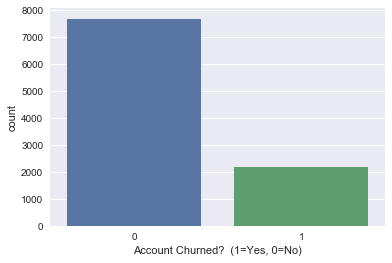

In [9]:
sns.set(style="darkgrid")
import seaborn as sns
ax = sns.countplot(x="Account Churned?  (1=Yes, 0=No)", data=meltwater)

In [10]:
#undersampling 
no_churn = len(meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 1])
non_churn_indices = meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 0].index

random_indices = np.random.choice(non_churn_indices,no_churn,replace =False)
churn_indices = meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 1].index

under_sample_indices = np.concatenate([churn_indices,random_indices])
under_sample = meltwater.loc[under_sample_indices]

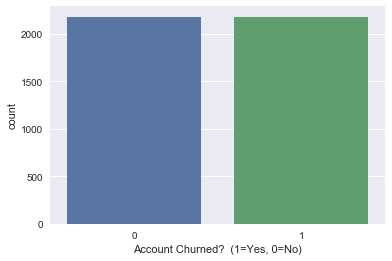

In [11]:
sns.countplot(x='Account Churned?  (1=Yes, 0=No)', data=under_sample)

In [12]:
under_sample.head()

,"Account Churned? (1=Yes, 0=No)",nbr of days since last account operation,nbr of days since last document operation,docs opened on mobile,docs opened in reports,docs opened on web,docs opened any source,docs tagged on mobile,docs tagged on web,docs shared any source,docs chg sentiment any source,docs hidden any source,mobile logins,web logins,mobile foreground
7,1,0.011270,0.000146,0.002301,0.000021,0.001463,0.000137,0.000704,0.0,0.000136,0.0,0.0,0.025862,0.010256,0.008104
19,1,0.017844,0.000000,0.000575,0.000000,0.000000,0.000007,0.000000,0.0,0.000000,0.0,0.0,0.008621,0.057143,0.003171
23,1,0.002254,0.000187,0.000000,0.000007,0.003291,0.000192,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.007326,0.000000
27,1,0.000751,0.001069,0.000000,0.001032,0.000610,0.001065,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000733,0.000000
28,1,0.001315,0.000847,0.000000,0.000674,0.003048,0.000845,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.003663,0.000000


In [13]:
array = under_sample.values
X = array[:,1:13]
Y = array[:,0]
Y[4]




1.0

In [14]:
#split the data
train, test = train_test_split(under_sample, test_size=0.2)

 
df = pd.DataFrame(under_sample, columns=["nbr of days since last account operation",
           "nbr of days since last document operation",
           "docs opened on mobile",
           "docs opened in reports",
           "docs opened on web",
           "docs opened any source",
           "docs tagged on mobile",
           "docs tagged on web",
           "docs shared any source",
           "docs chg sentiment any source",
           "docs hidden any source",
           "mobile logins",
           "web logins",
           "mobile foreground"]) 
# load the dataset as a pandas data frame
# define the target variable (dependent variable) as y
y =pd.DataFrame(under_sample["Account Churned?  (1=Yes, 0=No)"])


In [15]:
#split the undersampled data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
print( X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(3492, 12) (3492,)
(874, 12) (874,)


In [16]:
X_train.shape[1]

12

In [19]:
#keras model
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [20]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
3492/3492 [==============================] - 0s 135us/step - loss: 0.6927
Epoch 2/5
3492/3492 [==============================] - 0s 46us/step - loss: 0.6925
Epoch 3/5
3492/3492 [==============================] - 0s 48us/step - loss: 0.6924
Epoch 4/5
3492/3492 [==============================] - 0s 41us/step - loss: 0.6921
Epoch 5/5
3492/3492 [==============================] - 0s 49us/step - loss: 0.6919


In [21]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
3492/3492 [==============================] - 0s 44us/step - loss: 0.6915
Epoch 2/10
3492/3492 [==============================] - 0s 41us/step - loss: 0.6912
Epoch 3/10
3492/3492 [==============================] - 0s 41us/step - loss: 0.6908
Epoch 4/10
3492/3492 [==============================] - 0s 39us/step - loss: 0.6904
Epoch 5/10
3492/3492 [==============================] - 0s 40us/step - loss: 0.6900
Epoch 6/10
3492/3492 [==============================] - 0s 43us/step - loss: 0.6896
Epoch 7/10
3492/3492 [==============================] - 0s 40us/step - loss: 0.6892
Epoch 8/10
3492/3492 [==============================] - 0s 39us/step - loss: 0.6887
Epoch 9/10
3492/3492 [==============================] - 0s 40us/step - loss: 0.6883
Epoch 10/10
3492/3492 [==============================] - 0s 41us/step - loss: 0.6878


In [22]:

score = model.evaluate(X_test, y_test)

874/874 [==============================] - 0s 58us/step


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 52        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [24]:
# This can be improved
print (score)

0.6872534533659981


In [39]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### visualizing the model

![alt text](model_plot.png "Title")